# Assignment 7 - Logistic Regression Assignment

In [177]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

%matplotlib inline


In [178]:
address = 'C:\\Users\\Charbel\\Desktop\\Udemy\\2021 Data Science - MachineLearning Project Deployment Mastery\\pima-indians-diabetes.csv'

data = pd.read_csv(address)
print(data.shape)

data.head()

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

### Replacing the zero values

The strategy that I will use, to address the outliers,  is to choose a random value that is within 0.5 standard deviation from the mode. Assuming that the distribution of the input variables is normal, this should provide us with values that cover a range of realistic values based on the majority of results. I will apply this strategy to the mass, skin thickness, test results, pressure and plasma count attributes in the dataframe. I will also calculate the percentage of the attribute that is missing since this plays a significant factor in the accuracy of the model.

In [180]:
test_zero_values = data[data['test'] == 0]
non_zero_test_v = data[data['test'] != 0]

zero_true = len(data.loc[data['test'] == 0])
len_data = len(data['test'])

print("The percentage of missing values in the data is {0:2.2f}%".format(zero_true/len_data*100))

test_mode = int(non_zero_test_v['test'].mode())
test_std = non_zero_test_v['test'].std()

test_list = list(data['test'])
test_list2 = []

for i in range(len(test_list)):
    if test_list[i] == 0:
        random_factor = np.random.uniform(-0.5, 0.5)
        test_list2.append(test_mode + random_factor*test_std)
    else:
        test_list2.append(test_list[i])
    
data['test'] = test_list2
data

The percentage of missing values in the data is 48.70%


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,164.385849,33.6,0.627,50,1
1,1,85,66,29,64.496094,26.6,0.351,31,0
2,8,183,64,0,81.975886,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,149.103165,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,52.115057,30.1,0.349,47,1


In [181]:
skin_zero_values = data[data['skin'] == 0]
non_zero_skin_v = data[data['skin'] != 0]

zero_true = len(data.loc[data['skin'] == 0])
len_data = len(data['skin'])

print("The percentage of missing values in the data is {0:2.2f}%".format(zero_true/len_data*100))

skin_mode = int(non_zero_skin_v['skin'].mode())
skin_std = non_zero_skin_v['skin'].std()

skin_list = list(data['skin'])
skin_list2 = []

for i in range(len(skin_list)):
    if skin_list[i] == 0:
        random_factor = np.random.uniform(-0.5, 0.5)
        skin_list2.append(skin_mode + random_factor*skin_std)
    else:
        skin_list2.append(skin_list[i])
    
data['skin'] = skin_list2
data.describe()

The percentage of missing values in the data is 29.56%


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.960176,130.870041,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,9.030929,91.858485,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,75.395797,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.219658,112.927421,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,149.505360,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [182]:
press_zero_values = data[data['Pres'] == 0]
non_zero_press_v = data[data['Pres'] != 0]

zero_true = len(data.loc[data['Pres'] == 0])
len_data = len(data['Pres'])

print("The percentage of missing values in the data is {0:2.2f}%".format(zero_true/len_data*100))

press_mode = int(non_zero_press_v['Pres'].mode())
press_std = non_zero_press_v['Pres'].std()

press_list = list(data['Pres'])
press_list2 = []

for i in range(len(press_list)):
    if press_list[i] == 0:
        random_factor = np.random.uniform(-0.5, 0.5)
        press_list2.append(press_mode + random_factor*press_std)
    else:
        press_list2.append(press_list[i])
    
data['Pres'] = press_list2
data.describe()

The percentage of missing values in the data is 4.56%


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,72.268505,29.960176,130.870041,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,12.134300,9.030929,91.858485,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,75.395797,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.219658,112.927421,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,149.505360,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [183]:
plas_zero_values = data[data['Plas'] == 0]
non_zero_plas_v = data[data['Plas'] != 0]

zero_true = len(data.loc[data['Plas'] == 0])
len_data = len(data['Plas'])

print("The percentage of missing values in the data is {0:2.2f}%".format(zero_true/len_data*100))

plas_mode = int(non_zero_plas_v['Plas'].mode()[1]) # Apparently 2 modes show up when calling for the mode of the non_zero data ( 99 & 100). I decided to use 100 as the mode for this calcualation
plas_std = non_zero_plas_v['Plas'].std()

plas_list = list(data['Plas'])
plas_list2 = []

for i in range(len(plas_list)):
    if plas_list[i] == 0:
        random_factor = np.random.uniform(-0.5, 0.5)
        plas_list2.append(plas_mode + random_factor*plas_std)
    else:
        plas_list2.append(plas_list[i])
    
data['Plas'] = plas_list2
data.describe()

The percentage of missing values in the data is 0.65%


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.561238,72.268505,29.960176,130.870041,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.487071,12.134300,9.030929,91.858485,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,75.395797,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.219658,112.927421,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,149.505360,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [184]:
mass_zero_values = data[data['mass'] == 0]
non_zero_mass_v = data[data['mass'] != 0]

zero_true = len(data.loc[data['mass'] == 0])
len_data = len(data['mass'])

print("The percentage of missing values in the data is {0:2.2f}%".format(zero_true/len_data*100))

mass_mode = int(non_zero_mass_v['mass'].mode())
mass_std = non_zero_mass_v['mass'].std()

mass_list = list(data['mass'])
mass_list2 = []

for i in range(len(mass_list)):
    if mass_list[i] == 0:
        random_factor = np.random.uniform(-0.5, 0.5)
        mass_list2.append(mass_mode + random_factor*mass_std)
    else:
        mass_list2.append(mass_list[i])
    
data['mass'] = mass_list2
data.describe()

The percentage of missing values in the data is 1.43%


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.561238,72.268505,29.960176,130.870041,32.447336,0.471876,33.240885,0.348958
std,3.369578,30.487071,12.134300,9.030929,91.858485,6.882672,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,75.395797,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.219658,112.927421,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,149.505360,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


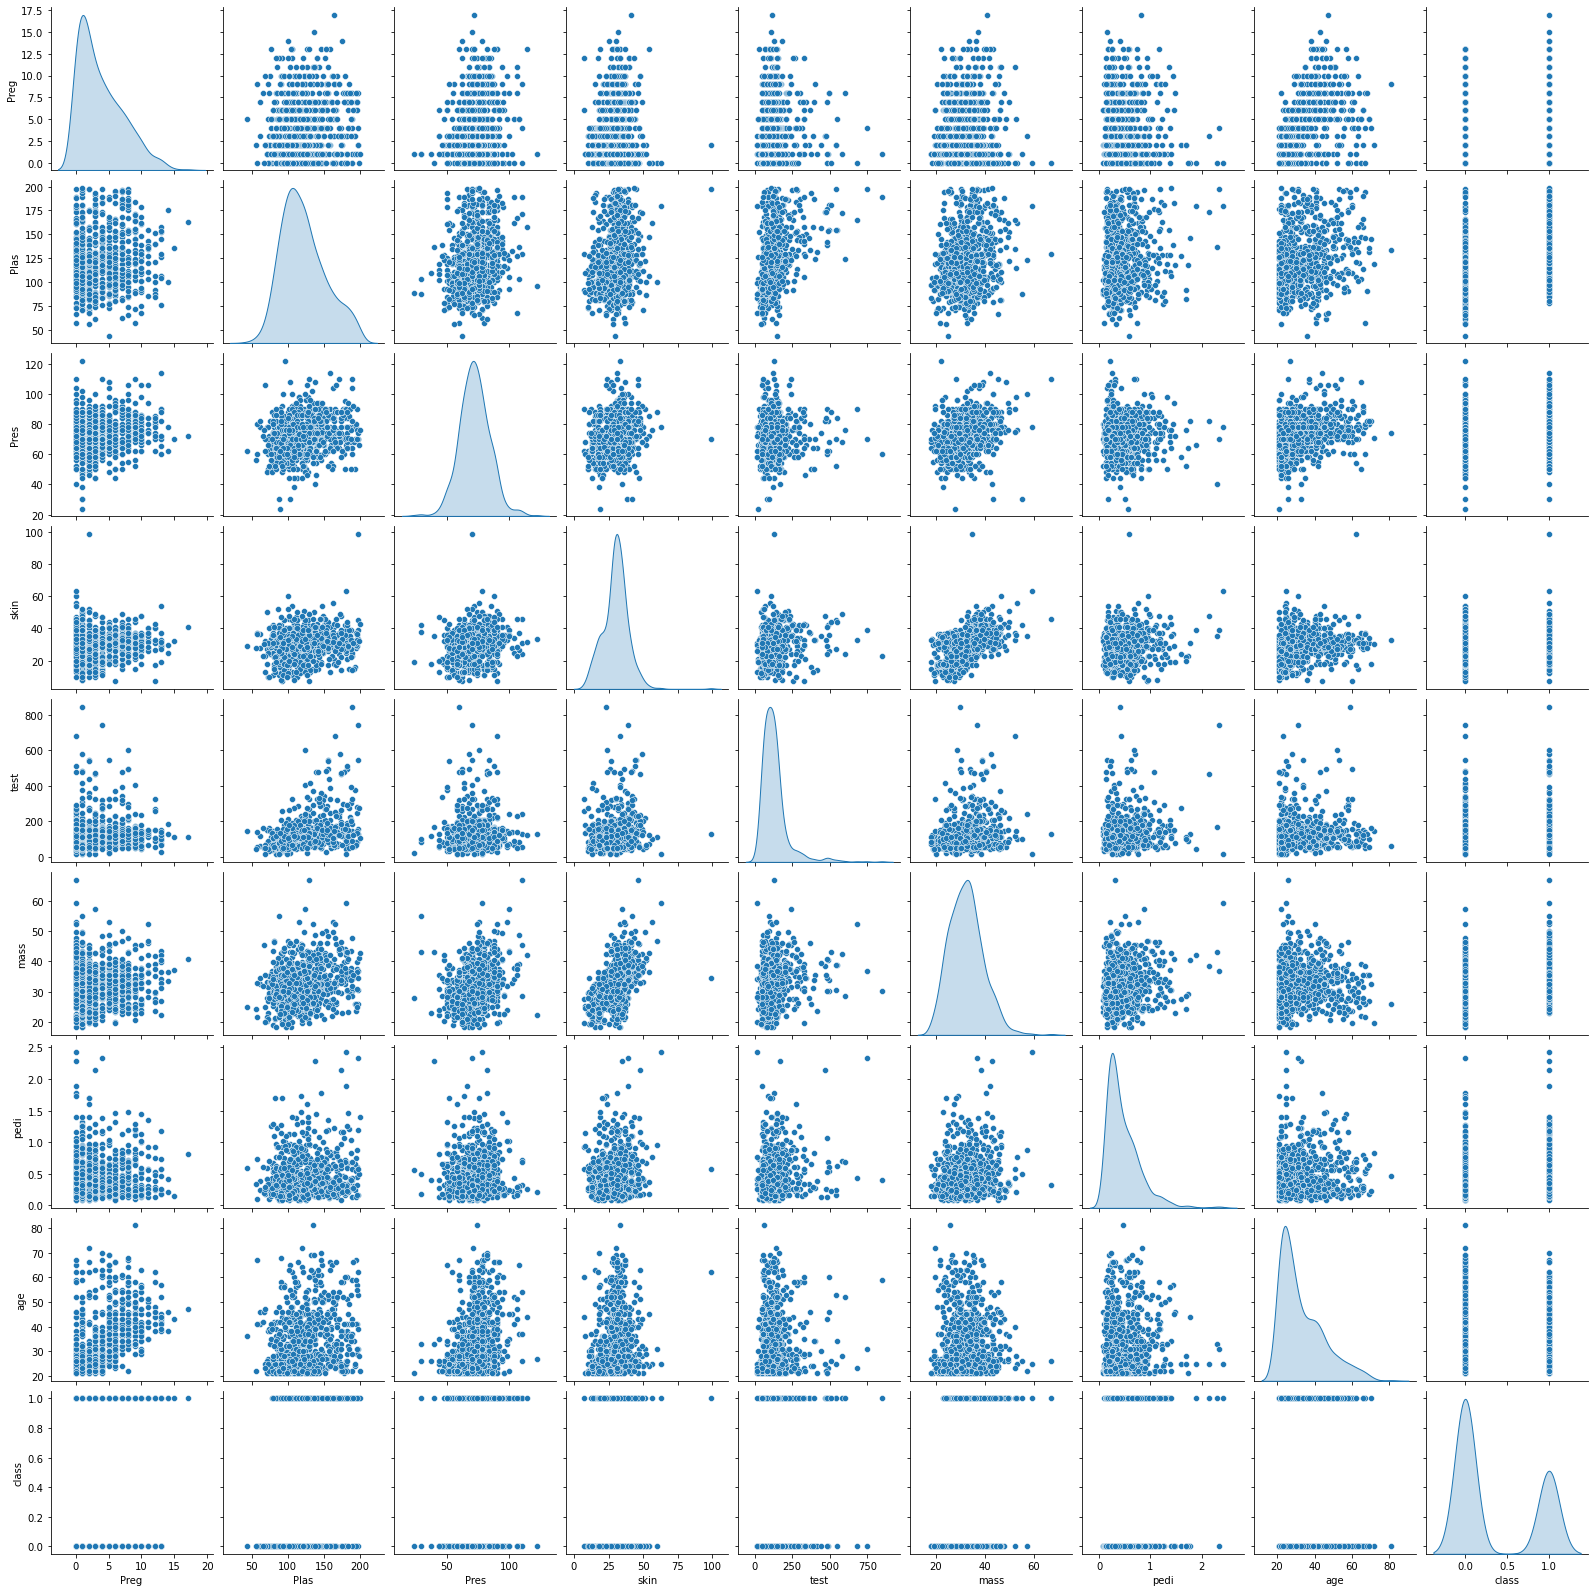

In [228]:
sb.pairplot(data, diag_kind = 'kde')

From the pairplot, The first thing to note is that there are no zero values in the attributes that shouldn't have zero values. Also the algorithm used to address the missing values normalizes the distributions more by focusing the new values around the mode of the datasets.

array([[<AxesSubplot:title={'center':'Preg'}>,
        <AxesSubplot:title={'center':'Plas'}>],
       [<AxesSubplot:title={'center':'Pres'}>,
        <AxesSubplot:title={'center':'skin'}>],
       [<AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'mass'}>],
       [<AxesSubplot:title={'center':'pedi'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

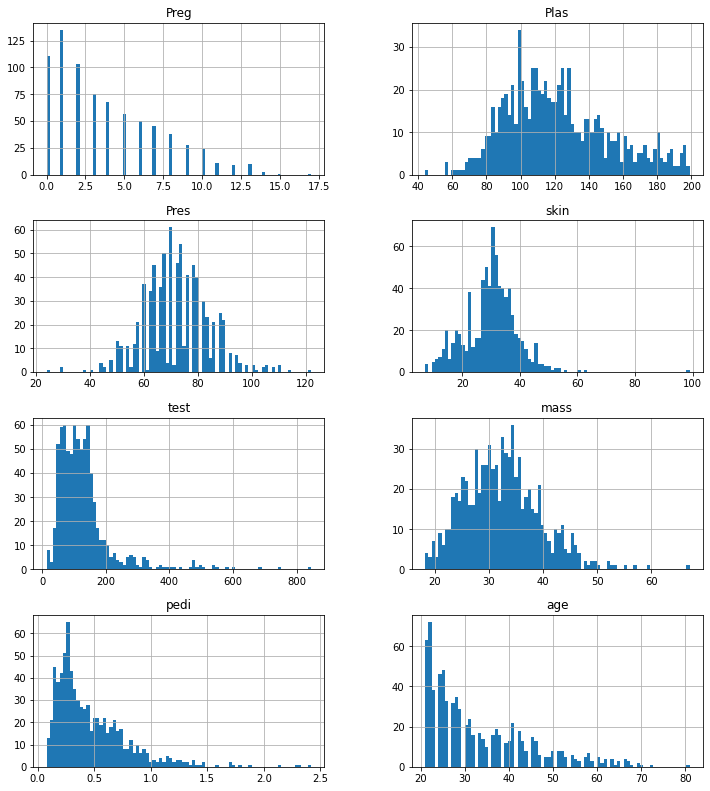

In [186]:
columns = list(data)[0:-1]
data[columns].hist(bins = 80, figsize = (12, 50), layout = (14, 2))

## Splitting the data for the model

In [373]:
x = data.drop('class', axis = 1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 4) # Tuned the random state to find the best model score

In the best interest of the model prediction, it is important to make sure that the split data is a good representation of the original data in terms of true/false values. So first we look at the true/false split of the original dataset...

In [366]:
n_true = len(data.loc[data['class'] == True])
n_false = len(data.loc[data['class'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


... and compare it to the split sets

In [367]:
print("----------------------------------------------------")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("----------------------------------------------------")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("----------------------------------------------------")

----------------------------------------------------
Training Diabetes True Values    : 189 (35.20%)
Training Diabetes False Values   : 348 (64.80%)
----------------------------------------------------
Test Diabetes True Values        : 79 (34.20%)
Test Diabetes False Values       : 152 (65.80%)
----------------------------------------------------


The comparison between original and split data shows that the distribution of true/false values in our training and test data is similar to the original. Therefore, our model should have a fair distribution to use in order to make a credible prediction.

## Logistic Regression

In [368]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [369]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [370]:
for indx, col_name in enumerate(x_train.columns):
    print("Coefficient of {} is {}".format(col_name, model.coef_[0][indx]))
print("")
print('the intercept of the model is {}'.format(model.intercept_))

Coefficient of Preg is 0.12337258024675653
Coefficient of Plas is 0.02705421482948229
Coefficient of Pres is -0.029814993719539183
Coefficient of skin is -0.008721753051937571
Coefficient of test is -0.0009336172225341838
Coefficient of mass is 0.07484042656802588
Coefficient of pedi is 0.5273085698804173
Coefficient of age is 0.014204339397433336

the intercept of the model is [-5.06232602]


In [371]:
model_score = model.score(x_test, y_test)
print(model_score)

0.8095238095238095


The Accuracy of the model is: 0.810
---------------------------------------


<AxesSubplot:>

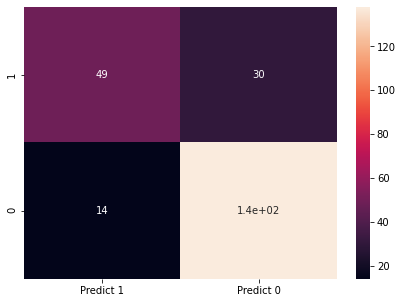

In [400]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

tp = int(cm[0][0])
fp = int(cm[1][0])
tn = int(cm[1][1])
fn = int(cm[0][1])

accu_score = (tp+tn)/(tp+tn+fp+fn)
print('The Accuracy of the model is: {:0.3f}'.format(accu_score))
print('---------------------------------------')

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]], 
                         columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sb.heatmap(df_cm, annot=True)

In [396]:
prec_score = tp/(fp+tp)
recall_score = tp/(fn+tp)
print('The Precision Score for the model is: {:0.3f}'.format(prec_score))
print('---------------------------------------------')
print('The Recall Score for the model is: {:0.3f}'.format(recall_score))
print('---------------------------------------------')
print('The F1 Score for the model is: {:0.3f}'.format(2*prec_score*recall_score/(prec_score+recall_score)))
print('---------------------------------------------')

The Precision Score for the model is: 0.778
---------------------------------------------
The Recall Score for the model is: 0.620
---------------------------------------------
The F1 Score for the model is: 0.690
---------------------------------------------


## Conclusions

The strategy used for dealing with outliers didn't make a notable difference to the model results. However, it may be more effective when there is less missing data. 

The overall score of the model is close to 81%. This is a fair model, but can be improved upon with additional data. As it stands nearly half of the data in the 'test' attribute is missing and nearly 30% of the data under the 'skin' attribute is also missing. The coefficients for both of these attributes are fairly small and it is hard to tell if adding data would have improved the coefficent for them. 

The confusion matrix shows that there are 14 Type I errors and 30 Type II errors attributed to the model prediction. In general, nearly 187 points were predicted correctly.

The Precision Score of the model shows that it can correctly predict positive values ~78% of the time. the Recall Score shows that the model can correctly predict the positives out of actual positives 62% of the time. The F1 Score shows that the model has an accuracy of 69%. This provides an alternative to Accuracy in which the score is 81%.